# Visualisierung 1: Trainings-Rückblick

## Imports

In [49]:
import fitparse
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import math
from fit_extractor import extract_day, extract_coordinates, extract_distance
import ipywidgets as widgets
from matplotlib.colors import LinearSegmentedColormap

## Einstellungen
Hier können Hintergrundfarbe, Farbverlauf und Beschriftungsfarbe der Visualisierung angepasst werden:

In [50]:
## interkatives Auswählen der Hintergrundfarbe
BACKGROUND_COLOR = widgets.ColorPicker(value='white', description='Hintergrund')
BACKGROUND_COLOR
## manuelles Auswählen der Hintergrundfarbe mit Hex-Wert bei fehlender Browserunterstützung
# BACKGROUND_COLOR = #ffffff

ColorPicker(value='white', description='Hintergrund')

In [51]:
## interkatives Auswählen der Anfangsfarbe des Farbverlaufs
GRADIENT_START_COLOR = widgets.ColorPicker(value='lightgray', description='Anfang Farbverlauf')
GRADIENT_START_COLOR
## manuelles Auswählen der Farbe mit Hex-Wert bei fehlender Browserunterstützung
# GRADIENT_START_COLOR = #ffffff

ColorPicker(value='lightgray', description='Anfang Farbverlauf')

In [52]:
## interkatives Auswählen der Endfarbe des Farbverlaufs
GRADIENT_END_COLOR = widgets.ColorPicker(value='gray', description='Ende Farbverlauf')
GRADIENT_END_COLOR
## manuelles Auswählen der Farbe mit Hex-Wert bei fehlender Browserunterstützung
# GRADIENT_END_COLOR = #ffffff

ColorPicker(value='gray', description='Ende Farbverlauf')

In [42]:
## interkatives Auswählen der Beschriftungsfarbe
LABEL_COLOR = widgets.ColorPicker(description='Beschriftung')
LABEL_COLOR
## manuelles Auswählen der Farbe mit Hex-Wert bei fehlender Browserunterstützung
# GRADIENT_END_COLOR = #ffffff

ColorPicker(value='black', description='Beschriftung')

## Visualisierung

In [43]:
directory_path = 'data/v1/'

# Lese alle im Verzeichnis vorliegenden Dateien ein
fitfiles = []
for file in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file)
    if os.path.isfile(file_path):
        fitfiles.append(fitparse.FitFile(file_path))

In [44]:
# Ermittle interessante Daten zu jeder eingelesenen Datei
dates = []
coordinates_lat = []
coordinates_long = []
distances = []
for file in fitfiles:
    dates.append(extract_day(file))
    (lat, long) = extract_coordinates(file)
    coordinates_lat.append(lat)
    coordinates_long.append(long)
    distances.append(extract_distance(file))
    
# Speichere Daten in einem Dataframe und sortiere diesen
df = pd.DataFrame({'Datum':dates, 'Koordinaten_lat':coordinates_lat, 'Koordinaten_long':coordinates_long, 'Distanz in m':distances})
df.sort_values(by='Datum', inplace=True)

C:\Users\Arbeit\AppData\Local\Temp/ipykernel_6916/2692208181.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_xticklabels(["{}km".format(int(i)) for i in cbar.get_ticks()])


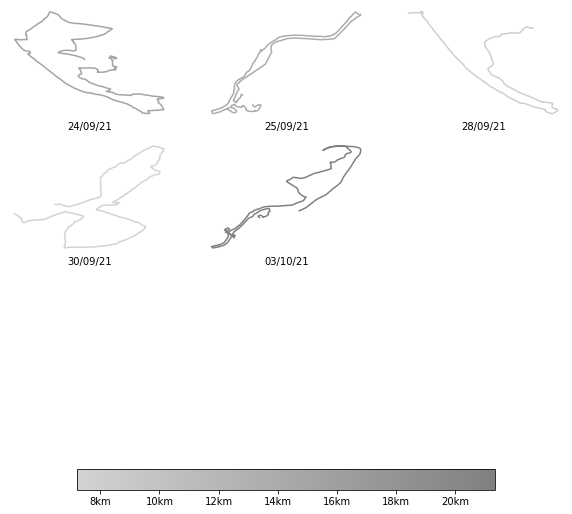

In [53]:
# Berechnung relevanter Meta-Daten
length = math.ceil(math.sqrt(len(df)))
size = length*length
maxDistanz = df['Distanz in m'].max()
minDistanz = df['Distanz in m'].min()
plt.rcParams["figure.figsize"] = (10, 10)

# Transformation/Definition von Farbverlauf und Beschriftungsfarbe
gradient_colors = [mpl.colors.to_rgb(GRADIENT_START_COLOR.value), mpl.colors.to_rgb(GRADIENT_END_COLOR.value)]
custom_cmap = LinearSegmentedColormap.from_list('Farbverlauf', gradient_colors, N=10000)
norm = mpl.colors.Normalize(vmin=(minDistanz/1000), vmax=(maxDistanz/1000))
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])
labelcolor = mpl.colors.to_rgb(LABEL_COLOR.value)

# Erstellen der Visualisierung
fig, ax = plt.subplots(length, length)

for i in range(0,size):
    x = math.floor(i/length)
    y = i%length
    axs = ax[x, y]
    #print("{}, {}".format(x, y))
    if i <= length+1:
        entry = df.iloc[i]
        axs.plot(entry['Koordinaten_lat'],entry['Koordinaten_long'], color=sm.to_rgba(entry['Distanz in m']/1000))
        axs.text(0.5,-0.1, entry['Datum'].strftime("%d/%m/%y"), ha="center", transform=axs.transAxes, color=labelcolor)
    axs.axis("off")

# Erstellen der Farblegende
cbar = fig.colorbar(sm, ax=[ax[:, :]], orientation="horizontal", shrink=0.75)
cbar.ax.xaxis.set_tick_params(color=labelcolor, labelcolor=labelcolor)
cbar.ax.set_xticklabels(["{}km".format(int(i)) for i in cbar.get_ticks()])

fig.patch.set_color(mpl.colors.to_rgb(BACKGROUND_COLOR.value))

plt.show()